In [1]:
from ipynb.fs.defs.functions import *

from datetime import datetime
import networkx as nx
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import sys
import contextlib
import itertools
from math import comb
from numpy import linalg as LA
import math
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
from math import factorial as f
import networkx as nx
import itertools
import time
import pandas as pd
import random as rnd

def theoretic_fixation_moran(nodes,fitness):
    if fitness==1:
        return 1/(nodes)
    else:
        k=(1-1/fitness)/(1-1/(pow(fitness,nodes)))
        return k
    
def theoretic_fixation_moran_dB(nodes,fitness):
    if fitness==1:
        return 1/(nodes)
    else:
        k=((nodes-1)/(nodes))*((1-1/fitness)/(1-1/(pow(fitness,nodes-1))))
        return k
    


In [2]:
graph_enum_6 = iso_graph(get_all_graphs(6))

In [ ]:
# Calculating and storing the fixation probabilities for 100 different weighted assignments for each of the 112 networks  

start_time = datetime.now()

weighted_networks_db_6nodes = np.zeros((112, 100), dtype=object)
for i in range(112):
    for j in range(100):
        G=graph_enum_6[i]
        for u,v in G.edges():
            G[u][v]['weight']=rnd.random()
        weighted_networks_db_6nodes[i,j]=[matrix_solver(T_WeightMat_dB(G,k/10))-theoretic_fixation_moran_dB(6,k/10) for k in range(1,20)]
    np.save('weighted_networks_db_6nodes.npy' , weighted_networks_db_6nodes ) 
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))        

np.save('weighted_networks_db_6nodes.npy' , weighted_networks_db_6nodes )

In [19]:
##classifying 

classifier_100 = np.zeros((112, 100), dtype=object)

check=[]

for i in range(112):
    for j in range(100):
        for k in range(3,19):
            if k==9:
                continue
            check.append(np.sign(weighted_networks_db_6nodes[i][j][k]))
        if check==[1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1]:
            #suppressor
            classifier_100[i,j]= "Suppressor"
        elif check==[-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1]:
            #amplifier
            classifier_100[i,j]= "Amplifier"
        elif check==[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]:
            #isothermal
            classifier_100[i,j]= "Isothermal"
        else:
            #neither
            classifier_100[i,j]= "Neither"
        check=[]
            
            
###list of suppressors and 'neither' networks
amp_100=0
sup_100=0
neither_100=0
iso_100=0

sup_list_100=[]
neither_list_100=[]
iso_list_100=[]

for i in range(112):
    for j in range(100):
        if classifier_100[i,j]== "Suppressor":
            sup_100+=1
            sup_list_100.append([i,j])
        elif classifier_100[i,j]== "Amplifier":
            amp_100+=1
        elif classifier_100[i,j]== "Isothermal":
            iso_100+=1
            iso_list_100.append([i,j])
        else:
            neither_100+=1
            neither_list_100.append([i,j])
            
            
print(amp_100, sup_100, neither_100,iso_100)

0 11125 75 0


| Amplifiers| Suppressors | Neither |
|----------|----------|----------|
| 11125| 75 | 0 |

These are the results we see in Table 1.

## Analysis

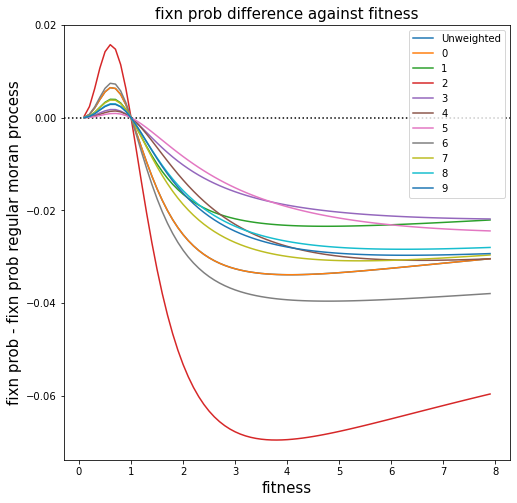

In [73]:
G=graph_enum_6[111]
for u,v in G.edges():
    G[u][v]['weight']=rnd.random()
    



plt.figure(figsize=(8, 8))
plt.plot([i/10 for i in range(1,80)],[matrix_solver(T_weightMat_dB(G,i/10))-theoretic_fixation_moran_dB(6,i/10) for  i in range(1,80)],label="Unweighted")
plt.axhline(y=0, color='black', ls=':')
for(l) in range(10):
    plt.plot([i/10 for i in range(1,80)],[matrix_solver(T_weightMat_dB(G,i/10))-theoretic_fixation_moran_dB(6,i/10) for  i in range(1,80)],label=l)
    for u,v in G.edges():
        G[u][v]['weight']=rnd.random()



plt.title('fixn prob difference against fitness',fontsize=15)
plt.xlabel('fitness',fontsize=15)
plt.ylabel('fixn prob - fixn prob regular moran process',fontsize=15)
plt.legend()
plt.show()


## Scatterplot

In [3]:
weighted_networks_db_6nodes=np.load('weighted_networks_db_6nodes.npy', allow_pickle=True)

In [4]:
graph_6_nodes_db_unweighted_r_1_3=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],1.3))-theoretic_fixation_moran_dB(6,1.3) for i in range(112)]

In [5]:
graph_6_nodes_db_unweighted_r_0_9=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],0.9))-theoretic_fixation_moran_dB(6,0.9) for i in range(112)]

In [ ]:
weighted_networks_db_6nodes=np.load('weighted_networks_db_6nodes.npy', allow_pickle=True)
graph_6_nodes_db_unweighted_r_1_3=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],1.3))-theoretic_fixation_moran_dB(6,1.3) for i in range(112)]
graph_6_nodes_db_unweighted_r_0_9=[matrix_solver(T_WeightMat_dB(graph_enum_6[i],0.9))-theoretic_fixation_moran_dB(6,0.9) for i in range(112)]
weighted_networks_10_r_0_9=graph_6_nodes_db_unweighted_r_0_9
weighted_networks_10_r_1_3=graph_6_nodes_db_unweighted_r_1_3
weighted_networks_100=weighted_networks_db_6nodes

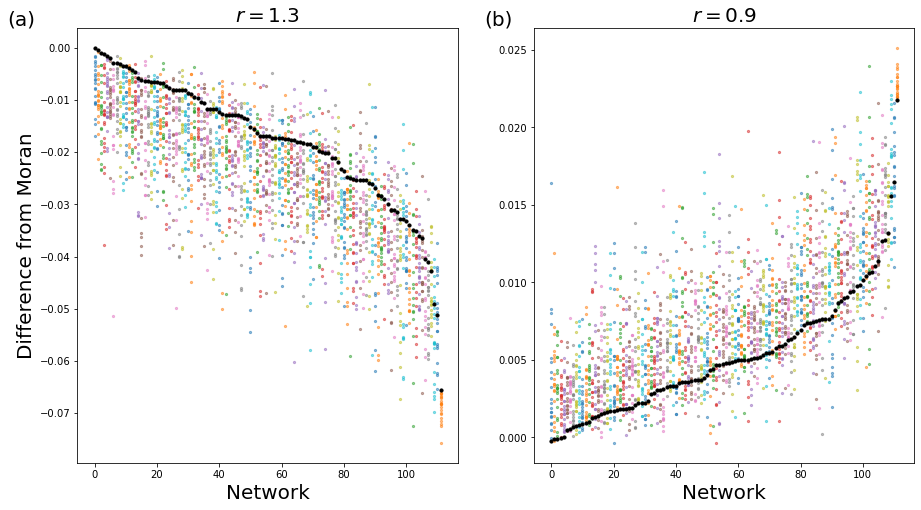

In [13]:
#plt.figure(figsize=(10, 10)) 
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
dim=20
radius=5
#fig, (ax1, ax2) = plt.subplots(1, 2)
#f, axs = plt.subplots(2, 2, figsize=(15, 15))
#fig.suptitle('Horizontally stacked subplots',fontsize=20)
indices_sort_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_1_3)), key=lambda i: graph_6_nodes_db_unweighted_r_1_3[i], reverse=True)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sort_by_value[j]][i][12] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[0].scatter(x, y,s=radius, alpha=0.5)
    axs[0].scatter(j,graph_6_nodes_db_unweighted_r_1_3[indices_sort_by_value[j]],s=2*radius,color='black')
    
indices_sorted_by_value = sorted(range(len(graph_6_nodes_db_unweighted_r_0_9)), key=lambda i: graph_6_nodes_db_unweighted_r_0_9[i], reverse=False)
for j in range(112):
    #weighted_networks_db_6nodes[j][i][13]
    #N = 50
    x = j*np.ones(dim)
    y = [weighted_networks_db_6nodes[indices_sorted_by_value[j]][i][8] for i in range(dim)]
    #colors = np.random.rand(N)
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    axs[1].scatter(x, y,s=radius, alpha=0.5)
    axs[1].scatter(j,graph_6_nodes_db_unweighted_r_0_9[indices_sorted_by_value[j]],s=2*radius,color='black')
axs[0].set_xlabel('Network',fontsize=20)
axs[0].set_ylabel('Difference from Moran',fontsize=20)

#axs[1].set_ylabel('Difference from Moran',fontsize=28)
axs[1].set_xlabel('Network',fontsize=20)

axs[0].set_title("$r=1.3$",fontsize=20)
axs[1].set_title("$r=0.9$",fontsize=20)
fig.text(0.06, 0.885, '(a)', fontsize=20)
fig.text(0.502, 0.885, '(b)', fontsize=20)
plt.savefig('db_scatterplot.pdf', bbox_inches="tight")
plt.show()

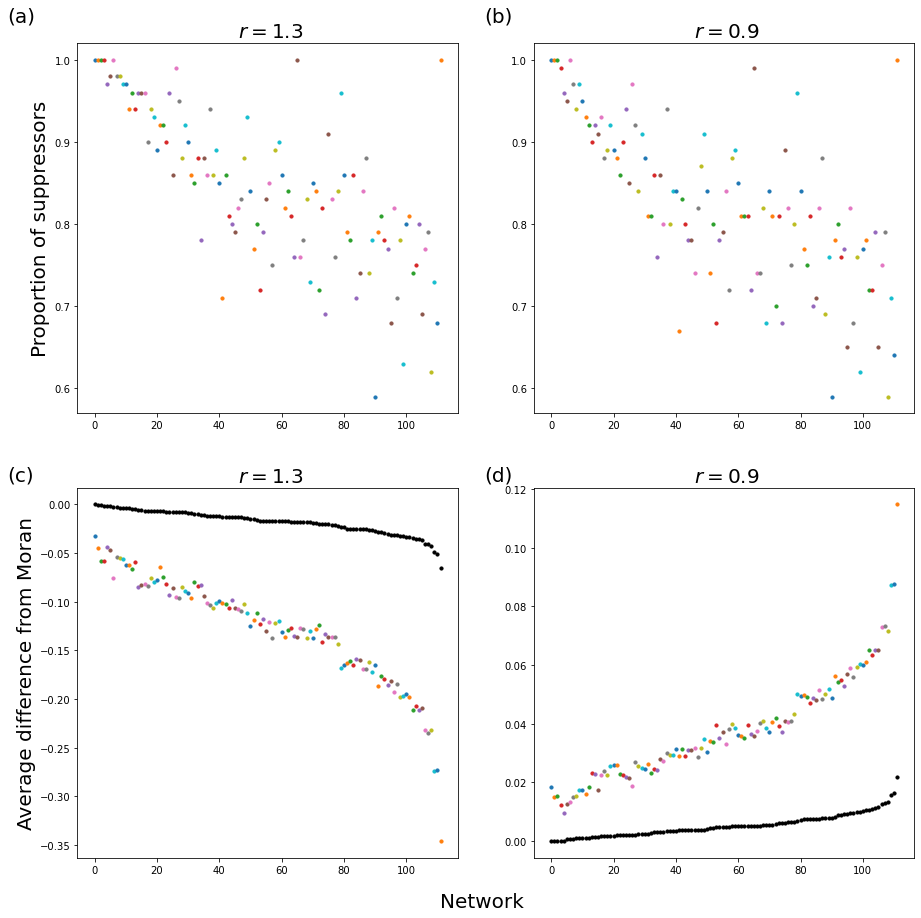

In [18]:
import matplotlib.pyplot as plt

# Assuming 'weighted_networks_100' and other data are defined somewhere in your code
# ...

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# First subplot (Top Left - (a))
indices_sort_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_1_3[i], reverse=True)
for j in range(112):
    axs[0, 0].scatter(j, sum(0.01 for num in [weighted_networks_100[indices_sort_by_value[j]][i][12]-weighted_networks_10_r_1_3[indices_sort_by_value[j]] for i in range(100)] if num < 0), s=2*radius)
#axs[0, 0].set_xlabel('Network', fontsize=20)
axs[0, 0].set_ylabel('Proportion of suppressors', fontsize=20)
axs[0, 0].set_title(" $r=1.3$", fontsize=20)

# Second subplot (Top Right - (b))
indices_sorted_by_value = sorted(range(len(weighted_networks_10_r_0_9)), key=lambda i: weighted_networks_10_r_0_9[i])
for j in range(112):
    axs[0, 1].scatter(j, sum(0.01 for num in [weighted_networks_100[indices_sort_by_value[j]][i][8]-weighted_networks_10_r_0_9[indices_sort_by_value[j]] for i in range(100)] if num > 0), s=2*radius)
#axs[0, 1].set_xlabel('Network', fontsize=20)
axs[0, 1].set_title(" $r=0.9$", fontsize=20)

# Third subplot (Bottom Left - (c))
for j in range(112):
    axs[1, 0].scatter(j, sum([weighted_networks_100[indices_sort_by_value[j]][i][12] for i in range(100)])/dim, s=2*radius)
#axs[1, 0].set_xlabel('Network', fontsize=20)
    axs[1,0].scatter(j,weighted_networks_10_r_1_3[indices_sort_by_value[j]],s=2*radius,color='black')
axs[1, 0].set_ylabel('Average difference from Moran', fontsize=20)
axs[1, 0].set_title(" $r=1.3$", fontsize=20)

# Fourth subplot (Bottom Right - (d))
for j in range(112):
    axs[1, 1].scatter(j, sum([weighted_networks_100[indices_sorted_by_value[j]][i][8] for i in range(100)])/dim, s=2*radius)
#axs[1, 1].set_xlabel('Network', fontsize=20)
    axs[1,1].scatter(j,weighted_networks_10_r_0_9[indices_sorted_by_value[j]],s=2*radius,color='black')
axs[1, 1].set_title(" $r=0.9$", fontsize=20)

fig.text(0.06, 0.9, '(a)', fontsize=20)
fig.text(0.502, 0.9, '(b)', fontsize=20)
fig.text(0.06, 0.475, '(c)', fontsize=20)
fig.text(0.502, 0.475, '(d)', fontsize=20)
# Adjusting layout
#plt.tight_layout()
#fig.suptitle('Network', fontsize=20)
fig.text(0.5, 0.08, 'Network', ha='center', fontsize=20)
# Saving and showing the plot
plt.savefig('combined_avg_proportion_scatterplot_db.pdf', bbox_inches="tight")
plt.show()
